# Docking-CG-sicgle

In [2]:
# ライブラリのインポート
import MDAnalysis
from MDAnalysis.analysis import align
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
# cgモデルの作成（ファイルの読み込み）

cg = MDAnalysis.Universe("../../../../1BRS/1brs_cg_sep.pdb","../../../../traj/dock2/cg_1250.xtc")

/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/lib/mdamath.py:295: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/lib/mdamath.py:296: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/lib/mdamath.py:297: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


In [6]:
# ATOM　obujectの作成
print (cg.atoms)
##output
print(list (cg.atoms[:5]))

<AtomGroup [<Atom 1: CA of type C of resname VAL, resid 3 and segid A and altLoc >, <Atom 2: CA of type C of resname ILE, resid 4 and segid A and altLoc >, <Atom 3: CA of type C of resname ASN, resid 5 and segid A and altLoc >, ..., <Atom 193: CA of type C of resname ILE, resid 195 and segid B and altLoc >, <Atom 194: CA of type C of resname LEU, resid 196 and segid B and altLoc >, <Atom 195: CA of type C of resname SER, resid 197 and segid B and altLoc >]>
[<Atom 1: CA of type C of resname VAL, resid 3 and segid A and altLoc >, <Atom 2: CA of type C of resname ILE, resid 4 and segid A and altLoc >, <Atom 3: CA of type C of resname ASN, resid 5 and segid A and altLoc >, <Atom 4: CA of type C of resname THR, resid 6 and segid A and altLoc >, <Atom 5: CA of type C of resname PHE, resid 7 and segid A and altLoc >]


In [7]:
# 残基の抽出
print(cg.atoms[100:130].residues)
print(list(cg.atoms.residues))

<ResidueGroup [<Residue TYR, 103>, <Residue GLN, 104>, <Residue THR, 105>, ..., <Residue LEU, 130>, <Residue LYS, 131>, <Residue LYS, 132>]>
[<Residue VAL, 3>, <Residue ILE, 4>, <Residue ASN, 5>, <Residue THR, 6>, <Residue PHE, 7>, <Residue ASP, 8>, <Residue GLY, 9>, <Residue VAL, 10>, <Residue ALA, 11>, <Residue ASP, 12>, <Residue TYR, 13>, <Residue LEU, 14>, <Residue GLN, 15>, <Residue THR, 16>, <Residue TYR, 17>, <Residue HIS, 18>, <Residue LYS, 19>, <Residue LEU, 20>, <Residue PRO, 21>, <Residue ASP, 22>, <Residue ASN, 23>, <Residue TYR, 24>, <Residue ILE, 25>, <Residue THR, 26>, <Residue LYS, 27>, <Residue SER, 28>, <Residue GLU, 29>, <Residue ALA, 30>, <Residue GLN, 31>, <Residue ALA, 32>, <Residue LEU, 33>, <Residue GLY, 34>, <Residue TRP, 35>, <Residue VAL, 36>, <Residue ALA, 37>, <Residue SER, 38>, <Residue LYS, 39>, <Residue GLY, 40>, <Residue ASN, 41>, <Residue LEU, 42>, <Residue ALA, 43>, <Residue ASP, 44>, <Residue VAL, 45>, <Residue ALA, 46>, <Residue PRO, 47>, <Residue G

In [8]:
# タンパク質、モノマーの抽出
print(cg.atoms.segments)

print(list(cg.atoms.segments))

<SegmentGroup [<Segment A>, <Segment B>]>
[<Segment A>, <Segment B>]


In [9]:
# トラジェクトリのフレーム数
print(len(cg.trajectory))

1251


In [10]:
# タンパク質のアラインメント
from MDAnalysis.analysis import align

# トラジェクトリの位置を最初のフレームにリセットする
cg.trajectory[0]

# align.AlignTrajでアラインメントを取る
alignment = align.AlignTraj( mobile = cg, reference = cg, select="protein", in_memory=True)
alignment.run()

/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/lib/mdamath.py:295: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/lib/mdamath.py:296: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/lib/mdamath.py:297: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


In [11]:
# フレーム二点間のRMSDを計算する
from MDAnalysis.analysis import rms

# 最初のフレームにリセット
cg.trajectory[0]

# 最初のタンパク質の位置
protein_first = cg.select_atoms("protein").positions

# 最後のフレームに移動
cg.trajectory[-1]

# 最後のタンパク質の位置
protein_last = cg.select_atoms("protein").positions

# rmsdを評価
print(rms.rmsd(protein_first, protein_last))

12.34905590934285


In [12]:
# トラジェクトリ全体のrmsdを計算する

# フレームのリセット
cg.trajectory[0]

# RMSD解析
RMSD_analysis = rms.RMSD(cg,   # アラインメントを取るオブジェクト  
                     cg,     # アラインメントを合わせるリファレンスのオブジェクト  
                     select = "backbone",  # 計算対象を主鎖にする  
                     ref_frame = 0    # リファレンスのフレームインデックス  
                        )
RMSD_analysis.run() 

In [13]:
print("type : ", type(RMSD_analysis.results.rmsd))
print("1st data : ", RMSD_analysis.results.rmsd[0])
print("total data number : ", len(RMSD_analysis.results.rmsd))

# type :  <class 'numpy.ndarray'>
# 1st data :  [0.0000000e+00 0.0000000e+00 6.0600393e-07]
# total data number :  50

type :  <class 'numpy.ndarray'>
1st data :  [0.00000000e+00 0.00000000e+00 6.69142166e-07]
total data number :  1251


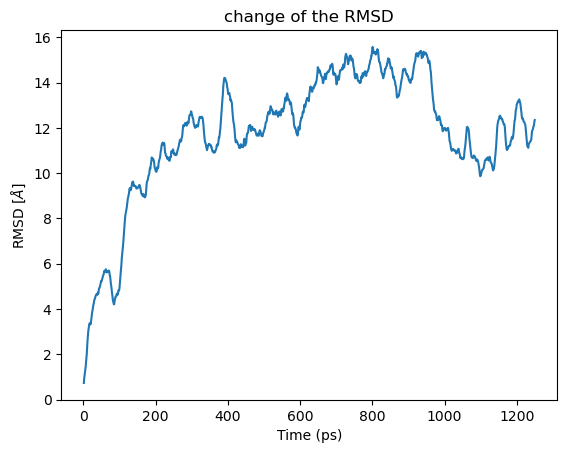

In [14]:
# RMSDのプロット
import matplotlib.pyplot as plt

time_ps = RMSD_analysis.results.rmsd[1:, 1]
backbone_RMSDs = RMSD_analysis.results.rmsd[1:, 2]

plt.plot(time_ps, backbone_RMSDs)

plt.title("change of the RMSD")
plt.xlabel("Time (ps)")
plt.ylabel("RMSD [$\AA$]")
plt.show()


/tmp/ipykernel_16347/4288657058.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)


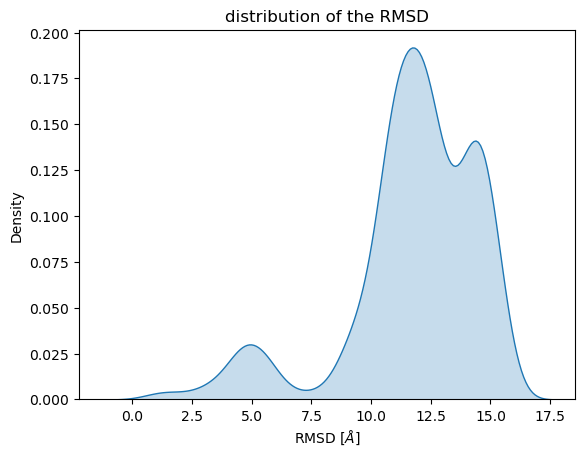

In [15]:
# 確立分布

import seaborn as sb

sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)

plt.title("distribution of the RMSD")
plt.xlabel("RMSD [$\AA$]")
plt.show()